In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from scipy.stats import f, f_oneway

In [8]:
dados_salarios = pd.read_csv('dados_salarios.csv')
dados_salarios

,cidade,salarios
0,A,3464.338550
1,A,3914.463351
2,A,2136.661666
3,A,3027.615130
4,A,4429.408854
5,A,4047.846284
6,A,1908.180306
7,A,1264.525840
8,A,1734.662448
9,A,3712.818657


In [9]:
dados_salarios.groupby('cidade') \
              .agg(media_salarios = pd.NamedAgg('salarios', 'mean'),
                   dp_salarios = pd.NamedAgg('salarios', 'std'),
                   n = pd.NamedAgg('salarios', 'count'))

,media_salarios,dp_salarios,n
cidade,,,
A,2964.052109,1117.505582,10
B,2432.859069,1342.126772,15


In [10]:
cid_a = dados_salarios[dados_salarios['cidade'] == 'A']['salarios']
cid_b = dados_salarios[dados_salarios['cidade'] == 'B']['salarios']

In [13]:
f_valor = np.var(cid_a, ddof = 1) / np.var(cid_b, ddof = 1)
f_valor

0.6932858292724237

In [14]:
dados_salarios.columns

Index(['cidade', 'salarios'], dtype='object')

In [15]:
gl_cid_a = len(cid_a) - 1
gl_cid_b = len(cid_b) - 1
gl_cid_a, gl_cid_b

(9, 14)

In [16]:
def f_p_value(f_statistic, df_n, df_d, test_type):

  '''test_type: greater, less, two.sided'''

  if test_type == 'greater':
    return 1 - f.cdf(f_valor, df_n, df_d)
  elif test_type == 'less':
    return f.cdf(f_valor, df_n, df_d)
  elif test_type == 'two.sided':
    p1 = f.cdf(f_valor, df_n, df_d)
    p2 = 1 - f.cdf(f_valor, df_n, df_d)
    return np.min([p1, p2])*2
  else:
    raise TypeError("'test_type' only accept options: 'greater', 'less' or 'two.sided'")

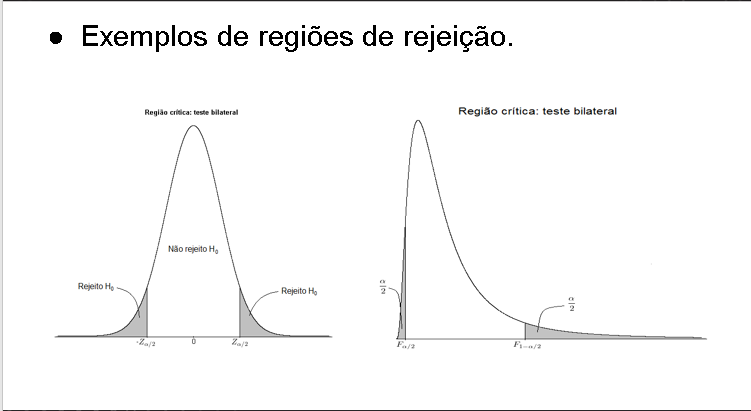

In [17]:
f_p_value(f_valor, gl_cid_a, gl_cid_b, test_type = 'two.sided')

0.5895222755367536

In [18]:
dados_salarios.columns

Index(['cidade', 'salarios'], dtype='object')

In [20]:
# Não rejeitamos o teste da hipótese

In [21]:
dados_dietas = pd.read_csv('dados_dietas.csv', sep = ';')

In [22]:
dados_dietas.columns

Index(['id', 'dieta', 'perda_peso_kg'], dtype='object')

In [23]:
dados_dietas.groupby('dieta') \
              .agg(media_perdapeso = pd.NamedAgg('perda_peso_kg', 'mean'),
                   dp_perdapeso = pd.NamedAgg('perda_peso_kg', 'std'),
                   n = pd.NamedAgg('perda_peso_kg', 'size'))


,media_perdapeso,dp_perdapeso,n
dieta,,,
baixa_caloria,6.6,2.302173,5
baixa_gordura,3.0,1.581139,5
baixo_carboidrato,3.4,1.140175,5
grupo_controle,1.2,1.643168,5


In [25]:
g_bcal = dados_dietas[dados_dietas['dieta'] == 'baixa_caloria']['perda_peso_kg']
g_bg = dados_dietas[dados_dietas['dieta'] == 'baixa_gordura']['perda_peso_kg']
g_bc = dados_dietas[dados_dietas['dieta'] == 'baixo_carboidrato']['perda_peso_kg']
g_bgc = dados_dietas[dados_dietas['dieta'] == 'grupo_controle']['perda_peso_kg']

In [26]:
f_oneway(g_bcal, g_bg, g_bc, g_bgc)

F_onewayResult(statistic=8.559322033898304, pvalue=0.0012777417892066623)

In [29]:
# decisão: rejeitamos a hipotese nula. alguma das medias é diferente.

In [28]:
dados_dietas.columns

Index(['id', 'dieta', 'perda_peso_kg'], dtype='object')

In [33]:
dados_bolsa = pd.read_csv('dados_bolsa.csv', sep = ';', decimal = ',')
dados_bolsa.head()

,data,petr4,bbdc3,vale5,ambv4,itub4
0,2004-05-26,-0.002270,0.009524,0.013699,0.032668,0.009843
1,2004-05-27,0.026301,0.028396,0.028303,0.014060,0.021442
2,2004-05-28,-0.016484,-0.000092,-0.025261,0.019151,0.000000
3,2004-05-31,0.010986,-0.009174,0.011235,-0.001786,0.000000
4,2004-06-01,0.028142,0.023056,-0.004518,0.013629,0.012107


In [34]:
dados_bolsa[dados_bolsa.isnull()]

,data,petr4,bbdc3,vale5,ambv4,itub4
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1773,NaN,NaN,NaN,NaN,NaN,NaN
1774,NaN,NaN,NaN,NaN,NaN,NaN
1775,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dados_bolsa_filtrados = dados_bolsa.dropna()
dados_bolsa_filtrados.shape

(1604, 6)

In [43]:
colunas =  ['petr4', 'bbdc3', 'vale5', 'ambv4', 'itub4']
correlacoes = dados_bolsa_filtrados[colunas].corr()


In [40]:
dados_bolsa_filtrados.columns

Index(['data', 'petr4', 'bbdc3', 'vale5', 'ambv4', 'itub4'], dtype='object')

In [44]:
correlacoes.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-44-596a3d06be71>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlacoes.style.background_gradient(cmap='coolwarm').set_precision(2)


,petr4,bbdc3,vale5,ambv4,itub4
petr4,1.00,0.54,0.72,0.39,0.59
bbdc3,0.54,1.00,0.59,0.47,0.78
vale5,0.72,0.59,1.00,0.48,0.64
ambv4,0.39,0.47,0.48,1.00,0.49
itub4,0.59,0.78,0.64,0.49,1.00
